In [1]:
#Importar bibliotecas de manipulação de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importação e leitura das planilhas 
df1= pd.read_csv('train_test.csv')
df2= pd.read_csv('valid_1.csv')

In [3]:
#Estatica descritiva do bando de dados
df1.describe()

,fid,lat,long,Produtividade,Diametro frutos,Frutos colhidos,frutos_ver,total_frut,NDVI,Banda red,...,Banda NIR,GNDVI,Horas Sol,EVI,IAF,GLI,Declividade,Altitude,Dens foliar,Porta enxerto
count,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,...,7250.000000,7250.000000,7250.000000,7250.000000,7.250000e+03,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000
mean,4662.657655,-22.797643,-49.428270,31.441751,60.757390,18.582529,13.681545,31.424717,0.761955,541.485814,...,3298.466621,0.718184,12.240207,1.728726,-9.285878e+06,108.525342,4.826721,576.601517,0.906577,0.261379
std,2754.263151,0.005002,0.009163,18.766982,9.824375,10.880692,7.609888,12.586105,0.076637,143.097625,...,307.689888,0.027189,0.293849,0.281454,4.583543e+06,34.094006,2.352462,49.349290,0.032844,0.439416
min,1.000000,-22.806107,-49.443951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.562000,11.500000,0.000000,-3.299794e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2238.250000,-22.801518,-49.436274,16.839931,56.758859,10.266667,8.200000,22.933333,0.710000,433.868256,...,3042.098022,0.707000,12.000000,1.516000,-1.132818e+07,87.332752,3.237688,553.000000,0.894037,0.000000
50%,4665.500000,-22.798884,-49.430687,28.238318,62.925485,16.733333,12.466667,31.466667,0.776000,499.251007,...,3321.695068,0.725000,12.500000,1.766000,-8.190538e+06,109.500000,4.573921,567.000000,0.908468,0.000000
75%,6867.750000,-22.794595,-49.418937,43.063474,66.623631,25.066667,18.266667,39.800000,0.828000,615.774765,...,3545.299744,0.737000,12.500000,1.981000,-6.192016e+06,131.944756,6.454830,610.000000,0.923477,1.000000
max,9212.000000,-22.785569,-49.411512,95.715973,100.403748,68.133333,48.666667,79.466667,0.879000,1351.239990,...,4233.972168,0.776000,13.000000,2.195000,0.000000e+00,196.300003,13.873369,648.000000,0.963966,1.000000


In [5]:
#Importar biblioteca de divisão de dados e escolher as variáveis que saem da análise
from sklearn.model_selection import train_test_split
X = df1.drop(['fid', 'lat', 'long', 'talhao', 'wkt_geom','Altitude', 'Produtividade', 'frutos_ver', 'Declividade', 'total_frut', 'Horas Sol' ], axis= 1)
y= df1['Produtividade']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [7]:
#Importar bibliteca do algoritmo de regressão e estabelecer a arquitetura 
from sklearn.ensemble import RandomForestRegressor
rfr =RandomForestRegressor(min_samples_leaf=30, n_estimators=1000, n_jobs=-1, random_state= 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=30, n_estimators=1000, n_jobs=-1,
                      random_state=0)

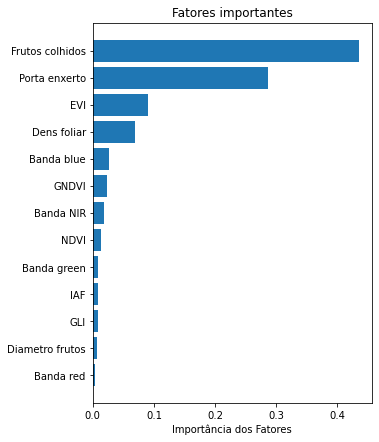

In [9]:
#Função que mostra a importância das váriaveis e fazer um gráfico de barras
feat_list = X.columns.values
feat_imp = rfr.feature_importances_
sort_idx = np.argsort(feat_imp)

plt.figure(figsize=(5,7))
plt.barh(range(len(sort_idx)),feat_imp[sort_idx], align = 'center')
plt.yticks(range(len(sort_idx)),feat_list[sort_idx])
plt.xlabel('Importância dos Fatores')
plt.title('Fatores importantes')
plt.draw()
plt.show()

In [10]:
y_pred = rfr.predict(df2.drop(['fid', 'lat', 'long', 'talhao', 'wkt_geom','Altitude', 'Produtividade', 'frutos_ver', 'Declividade', 'total_frut', 'Horas Sol'], axis = 1))

In [13]:
from sklearn import metrics
from sklearn.metrics import r2_score
mae =( metrics.mean_absolute_error(df2['Produtividade'], y_pred))
rmse =( np.sqrt(metrics.mean_squared_log_error(df2['Produtividade'], y_pred)))
r2= ( r2_score(df2['Produtividade'], y_pred))
print(f'Para o modelo: MAE = {mae}, RMSE = {rmse}, R² = {r2}')

Para o modelo: MAE = 9.406677261422386, RMSE = 0.3248832877354067, R² = 0.6898084589922528


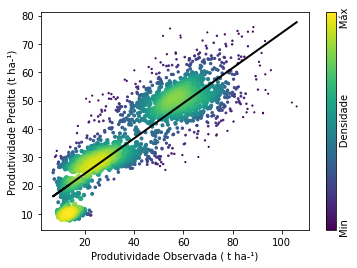

Para o modelo: MAE = 9.4067, RMSE = 0.3249, R² = 0.6898


In [16]:
from scipy.stats import gaussian_kde
x = df2['Produtividade']
y = y_pred

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)


idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

sizes = np.linspace(1, 30, len(x))

plt.scatter(x, y, c=z, s=sizes)

coefficients = np.polyfit(x, y, 1)
poly_function = np.poly1d(coefficients)
plt.plot(x, poly_function(x), color='black', linewidth=2, label='Regression Line')

cb = plt.colorbar()
cb.set_ticks([0, 0.5, 1])  
cb.set_ticklabels(['0', '0.5', '1']) 
cb.set_label('Min                       Densidade                     Máx')

plt.xlabel('Produtividade Observada ( t ha-¹)')
plt.ylabel('Produtividade Predita (t ha-¹)')

plt.show()
mae =( metrics.mean_absolute_error(df2['Produtividade'], y_pred))
rmse =( np.sqrt(metrics.mean_squared_log_error(df2['Produtividade'], y_pred)))
r2= ( r2_score(df2['Produtividade'], y_pred))
print(f'Para o modelo: MAE = {mae:.4f}, RMSE = {rmse:.4f}, R² = {r2:.4f}')

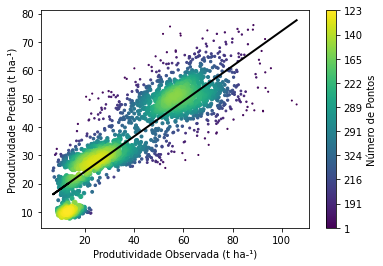

In [21]:
x = df2['Produtividade']
y = y_pred

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

sizes = np.linspace(1, 30, len(x))

plt.scatter(x, y, c=z, s=sizes)

coefficients = np.polyfit(x, y, 1)
poly_function = np.poly1d(coefficients)
plt.plot(x, poly_function(x), color='black', linewidth=2, label='Regression Line')


num_points = len(z)
density_intervals = np.linspace(np.min(z), np.max(z), 10) 
points_in_interval = [np.sum((z >= density_intervals[i]) & (z < density_intervals[i+1])) for i in range(len(density_intervals)-1)]
points_in_interval.append(np.sum(z >= density_intervals[-1]))

points_in_interval = points_in_interval[::-1]

cb = plt.colorbar()
cb.set_ticks(density_intervals)
cb.set_ticklabels(points_in_interval)
cb.set_label('Número de Pontos')

plt.xlabel('Produtividade Observada (t ha-¹)')
plt.ylabel('Produtividade Predita (t ha-¹)')

plt.show()

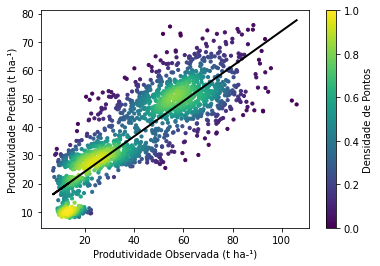

In [27]:
x = df2['Produtividade']
y = y_pred
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


num_intervals = 10

interval_indices = np.linspace(0, len(z), num_intervals + 1, dtype=int)

coefficients = np.polyfit(x, y, 1)
poly_function = np.poly1d(coefficients)
plt.plot(x, poly_function(x), color='black', linewidth=2, label='Regression Line')

points_in_interval = [interval_indices[i+1] - interval_indices[i] for i in range(num_intervals)]

normalized_z = (z - np.min(z)) / (np.max(z) - np.min(z))

plt.scatter(x, y, c=normalized_z, cmap='viridis', s=10)


cb = plt.colorbar()
cb.set_label('Densidade de Pontos')

plt.xlabel('Produtividade Observada (t ha-¹)')
plt.ylabel('Produtividade Predita (t ha-¹)')

plt.show()
